#1. 데이터 다운 받기
> 다음 사이트에 접속하여 ml-latest-small.zip 다운로드하기
* https://grouplens.org/datasets/movielens/

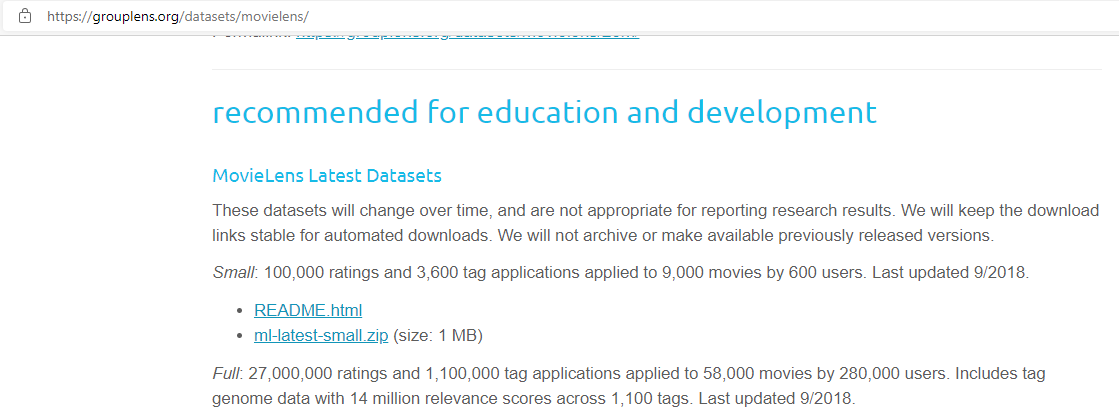

>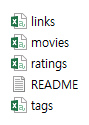

> 압축을 풀면 위처럼 나타나며 movies와 ratings을 이용하여 분석을 진행할 것이다.

#2. 데이터 가공 및 변환

##2.1 데이터 읽기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df_movies = pd.read_csv('/content/drive/MyDrive/2. 추천 알고리즘/3. collaborative filtering/data/movies.csv')
df_ratings = pd.read_csv('/content/drive/MyDrive/2. 추천 알고리즘/3. collaborative filtering/data/ratings.csv')

##2.2 데이터 가공

In [ ]:
print('movies')
print(df_movies.info())
print('===========================================')

print('ratings')
print(df_ratings.info())

movies
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None
ratings
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


> 두 정보를 확인 결과 결측치는 존재하지 않는 것을 알 수 있다. movies에는 영화의 id, 제목, 장르가 있는 것을 알 수 있다. ratings에는 사용자 id, 영화 id, 평점(rating), 어떤 시간 정보(timestamp)가 존재하는 것을 알 수 있다.

In [ ]:
print(df_ratings.head())
print(df_ratings.describe())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09


>head 정보를 확인해 보면 1번 사용자가 여러 영화의 평점을 작성한 것을 알 수 있다. 평점은 0.5점부터 5점까지 0.5단위로 설정되는 것을 알 수 있으며 이상치 역시 존재하지 않는 것을 볼 수 있다.

In [ ]:
from datetime import datetime

for idx in range(5):
  print(datetime.fromtimestamp(df_ratings['timestamp'][idx]))


2000-07-30 18:45:03
2000-07-30 18:20:47
2000-07-30 18:37:04
2000-07-30 19:03:35
2000-07-30 18:48:51


> 위에서 나타난 timestamp를 날짜로 변환해 보니 같은 날인 것을 알 수 있으며 평점을 작성한 시간으로 생각된다.

##2.3 데이터 변환

In [ ]:
pd.merge(df_ratings, df_movies, on='movieId')

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


> 영화 ID대신 영화 제목을 출력하기 위해 두 dataframe을 합칠 것이다. merge함수를 이용하면 on 옵션에서 지정한 값을 기준으로 두 dataframe을 합칠 수 있다.

In [ ]:
df_ratings_movies = pd.merge(df_ratings, df_movies, on='movieId')
df_ratings_movies_pivot = df_ratings_movies.pivot_table('rating', index='userId', columns='title')
df_ratings_movies_pivot[:3]

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Streets (2016),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09""01 - September 11 (2002)",11:14 (2003),"11th Hour, The (2007)",12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Rounds (2009),12 Years a Slave (2013),...,Zathura (2005),Zatoichi and the Chest of Gold (Zatôichi senryô-kubi) (Zatôichi 6) (1964),Zazie dans le métro (1960),Zebraman (2004),"Zed & Two Noughts, A (1985)",Zeitgeist: Addendum (2008),Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Zipper (2015),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Strippers! (2008),Zombieland (2009),Zone 39 (1997),"Zone, The (La Zona) (2007)",Zookeeper (2011),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoom (2015),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>merge를 통해 영화 제목을 얻게 되어 위처럼 영화 제목을 화면에 출력할 수도 있다.

In [ ]:
df_ratings_movies_pivot = df_ratings_movies_pivot.fillna(0)
df_ratings_movies_pivot.head()
df_ratings_movies_pivot.columns

Index([''71 (2014)', ''Hellboy': The Seeds of Creation (2004)',
       ''Round Midnight (1986)', ''Salem's Lot (2004)',
       ''Til There Was You (1997)', ''Tis the Season for Love (2015)',
       ''burbs, The (1989)', ''night Mother (1986)',
       '(500) Days of Summer (2009)', '*batteries not included (1987)',
       ...
       'Zulu (2013)', '[REC] (2007)', '[REC]² (2009)',
       '[REC]³ 3 Génesis (2012)',
       'anohana: The Flower We Saw That Day - The Movie (2013)',
       'eXistenZ (1999)', 'xXx (2002)', 'xXx: State of the Union (2005)',
       '¡Three Amigos! (1986)', 'À nous la liberté (Freedom for Us) (1931)'],
      dtype='object', name='title', length=9719)

>NaN으로 값이 지정되어 있으면 유사도를 구할 수 없기 때문에 0으로 변환시켰다.

#3. 영화 간 유사도 산출

##3.1 사용자 기반 추출
>우선 위의 정보를 이용하여 사용자간의 유사도를 알아본 후 가장 유사도가 높은 사용자의 정보로 추천 시스템을 만들 것이다.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(df_ratings_movies_pivot, df_ratings_movies_pivot)
user_based_collaboration=pd.DataFrame(data=user_similarity, index=df_ratings_movies_pivot.index, columns=df_ratings_movies_pivot.index)
user_based_collaboration[1].sort_values(ascending=False)[:11]

userId
1      1.000000
266    0.357408
313    0.351562
368    0.345127
57     0.345034
91     0.334727
469    0.330664
39     0.329782
288    0.329700
452    0.328048
45     0.327922
Name: 1, dtype: float64

>userId가 1인 사용자와 취향이 비슷한 10명을 추렸다. 여기서 가장 유사한 266번의 영화 정보를 확인해 보자

In [ ]:
df_ratings_movies_pivot.loc[266].sort_values(ascending=False)[:10]

title
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    5.0
Crow, The (1994)                                                                  5.0
Goodfellas (1990)                                                                 5.0
Untouchables, The (1987)                                                          5.0
Dirty Work (1998)                                                                 5.0
Fear and Loathing in Las Vegas (1998)                                             5.0
Ref, The (1994)                                                                   5.0
Matrix, The (1999)                                                                5.0
This Is Spinal Tap (1984)                                                         5.0
Time Bandits (1981)                                                               5.0
Name: 266, dtype: float64

>위와 같이 상위 10개의 정보만 출력해 봤다. 그럼 userId가 1인 사용자와 비교해 보자

In [ ]:
df_ratings_movies_pivot.loc[1].sort_values(ascending=False)[:10]

title
Messenger: The Story of Joan of Arc, The (1999)    5.0
Willy Wonka & the Chocolate Factory (1971)         5.0
Winnie the Pooh and the Blustery Day (1968)        5.0
Red Dawn (1984)                                    5.0
Fargo (1996)                                       5.0
Dumb & Dumber (Dumb and Dumber) (1994)             5.0
Dumbo (1941)                                       5.0
Ghost and the Darkness, The (1996)                 5.0
Sword in the Stone, The (1963)                     5.0
Black Cauldron, The (1985)                         5.0
Name: 1, dtype: float64

>출력된 결과를 봐서는 266 사용자와 겹치는 내용이 없다.

In [ ]:
def get_score_movie(dataFrame, userId):
  # userid에 따른 영화 추출
  user_movie=dataFrame.loc[userId]
  
  # 데이터를 횡으로 만들고 역치
  # movie_list = [user_movie.index, user_movie.values]
  # df_ratings_movies_score= pd.DataFrame(data=movie_list)
  # df_ratings_movies_score.index = ['title', 'score']
  # print(df_ratings_movies_score)
  # df_ratings_movies_score_T = df_ratings_movies_score.transpose()
  # return df_ratings_movies_score_T
  
  #dict 형식으로 dataframe 생성
  # df_ratings_movies_score= pd.DataFrame(data={'title':user_movie.index, 'score':user_movie.values})
  # print(df_ratings_movies_score)
  # return df_ratings_movies_score

  #series를 dataframe으로 변환
  df_ratings_movies_score = user_movie.to_frame(name='score')
  return df_ratings_movies_score.reset_index()

df_user1_movies = get_score_movie(df_ratings_movies_pivot, 1)
df_user1_movies

>우선 사용자 ID에 따른 영화 및 점수를 DataFrame으로 변환시킨다. 첫 번째 줄에서 loc로 값을 읽어 오면 series 형식으로 얻어 오게 된다. 이 값을 영화 제목과 평점으로 이루어진 DataFrame으로 변환 시킬 것이다.

> series의 index 정보가 영화 제목이고 값이 평점이므로 이를 간단하게 리스트로 변환시킨다. 그리고 이 값을 dataframe으로 변환한 다음 index를 추가해 준다. 이렇게 변경된 정보는 영화 제목이 column 정보로 나타나기 때문에 전치함수인 transpose()를 이용하여 행, 열을 변환한 후 반환하면 된다.

> 다른 방법으로는 data 입력 시 dictionary 형식으로 입력하게 되면 행, 열을 변환하지 않아도 된다.

> 가장 간단한 방법은 series를 dataframe 형식으로 변환하는 것이다.

In [ ]:
# 266사용자의 영화 목록
df_user266_movies = get_score_movie(df_ratings_movies_pivot, 266)
# user1이 안본 영화 목록
df_user1_movies_0 = df_user1_movies[df_user1_movies['score']==0]
# 266 user가 본 4.5 이상의 영화
df_user266_movies_5 = df_user266_movies[df_user266_movies['score']>4]

# user266이 4.5이상 평가한 영화 중 user1이 안 본 영화를 movie_list에 추가
movie_list=[]
for movieName in df_user266_movies_5['title']:
  df_recommand_movie = df_user1_movies_0[df_user1_movies_0['title']==movieName]
  lst = df_recommand_movie['title'].tolist()
  
  # if not lst: 비어 있는 경우
  if lst:
    movie_list.append(lst)

print('================================================================')
print(len(movie_list))

for i in range(10):
  print(movie_list[i])


35
['2001: A Space Odyssey (1968)']
['Aliens (1986)']
['Austin Powers: The Spy Who Shagged Me (1999)']
['Blade Runner (1982)']
['Brazil (1985)']
['Casino (1995)']
['Commitments, The (1991)']
['Crow, The (1994)']
['Dirty Work (1998)']
['Donnie Brasco (1997)']


>1번이 보지 않은 영화 중 266번이 본 5점짜리 영화를 추천하려고 한다. 우선 1번의 목록 중 평점이 0인 영화를 추출한다. 그리고 266번은 평점이 5점인 영화를 추출한다. 그리고 반복문을 이용하여 사용자1의 평점이 0인 영화와 사용자 266의 평점이 5인 같은 영화가 있는지 찾아보고 결과를 리스트에 저장한다. 이렇게 저장된 정보를 출력해 보면 35개의 영화가 추천되는 것을 볼 수 있다.

##3.2 다수의 사용자 기반 추천
> 우리가 이전 코드에서 유사도가 높은 10명의 사용자를 추출했다.이 10명의 사용자는 각 자 다른 영화를 봤겠지만 비슷한 영화들도 많을 것이다. 이 10명이 공통으로 추천하는 영화를 추천 정보로 사용해 보자.

>1. 유사도 높은 사용자 추출
2. 추천받을 사람의 안본 영화 추출
3. 추천하는 사람의 5점 영화 추출
4. 두 사람의 내용을 추려 추천 영화 목록 추출
5. 2 ~ 4를 반복하여 모든 사람의 영화 목록 정보 저장
6. 빈도수 구하기
7. 빈도수가 높은 영화 추천

###3.2.1 유사도 구하기

In [ ]:
def get_user_similarity(dataFrame, userId, top_N=10):
  user_similarity = cosine_similarity(dataFrame, dataFrame)

  df_user_similarity = pd.DataFrame(data=user_similarity, index=dataFrame.index, columns=dataFrame.index)
  
  return df_user_similarity[userId].sort_values(ascending=False)[1:top_N+1]

TARGET_USER = 1
get_user_similarity(df_ratings_movies_pivot, TARGET_USER)

userId
266    0.357408
313    0.351562
368    0.345127
57     0.345034
91     0.334727
469    0.330664
39     0.329782
288    0.329700
452    0.328048
45     0.327922
Name: 1, dtype: float64

>우선 사용자의 영화 취향이 비슷한 사람들을 알아 봤다. return 부분에서 본인은 제외 시키기 위해 [1:top_N+1]으로 표현했다.

In [ ]:
NON_MOVIE = 0
HIGH_SCORE = 5

def get_score_movie(dataFrame, userId, score=HIGH_SCORE):
  df_movie_score = dataFrame.loc[userId].to_frame(name='score').reset_index()
  if score==NON_MOVIE:
    return df_movie_score[df_movie_score['score']==NON_MOVIE]
  return df_movie_score[df_movie_score['score']>=score]

get_score_movie(df_ratings_movies_pivot, TARGET_USER, NON_MOVIE)

> 숫자들의 의미를 부여하기 위해 대문자로 표현했다.

>score가 0인 경우는 같은지를 비교해야 하지만 4인 경우는 4, 5점을 확인해야 하고 5인 경우는 5점을 확인해야 하기 때문에 >=(이상)으로 표현했다.

###3.2.2 추천영화
> 추천받을 사람이 안 본 영화 중 추천하는 사람이 5점으로 평가한 영화 목록을 반환받는 함수 제작

In [ ]:
def get_min_max(df_non_movies, df_high_score_movies):
  if len(df_non_movies)>len(df_high_score_movies):
    return df_high_score_movies, df_non_movies
  return df_non_movies, df_high_score_movies

def get_recommand_movies(df_non_movies, df_high_score_movies):
  df_src, df_target = get_min_max(df_non_movies, df_high_score_movies)

  df_recommand_movies = pd.DataFrame()
  for movie_name in df_src['title']:
    df_movie_title = df_target[df_target['title']==movie_name]
    if not df_movie_title.empty:
      # df_recommand_movies = df_recommand_movies.append({'title':df_recommand_movie['title'].values[0]})
      df_recommand_movies = df_recommand_movies.append(df_movie_title['title'].to_frame())

  return df_recommand_movies

>get_min_max()함수는 두 개의 dataframe을 받아서 짧은 값을 앞으로 긴 값을 뒤로 전달하는 함수이다. get_recommand_movies()함수에서 반복문을 짧게 돌리기 위해 만든 함수이다.

>get_recommand_movies()함수는 안본 영화 중 점수가 좋은 영화를 추천받기 위해 만든 함수이다. 반복문에서 제목을 읽어 들여 같은 영화 제목이 있으면 data frame에 저장하려고 한다. 값을 저장할 때 빈 값이 들어가서 empty로 빈 값을 확인했다. 현재 dataframe에는 title과 score가 존재하여 title만 적용하기 위해 dictionary 형식과 dataframe형식 두 가지를 적용해 보았다.

In [ ]:
USER1 = 1
USER2 = 266

# user1이 안본 영화 추출
df_non_movies = get_score_movie(df_ratings_movies_pivot, USER1, NON_MOVIE)
# print(df_non_movies)
# user2가 본 영화 중 5점인 영화 추출
df_high_score_movies = get_score_movie(df_ratings_movies_pivot, USER2, HIGH_SCORE)

# 추천 영화 추출
print(get_recommand_movies(df_non_movies, df_high_score_movies))

> 숫자를 직접 넣으면 추후 무슨 의미인지 잊어버릴 수도 있다. 가독성을 높이기 위해 수치들을 변수화 시켰다.

In [ ]:
#추천 받을 영화 수
RECOMMAND_MOVIE = 10
#추천 받을 사용자
TARGET_USER = 1
# 안본 영화
NON_MOVIE = 0
# 추천 받을 최저점
HIGH_SCORE = 4

# 추천받고자하는 사용자와 유사도가 높은 사용자 찾기
# 기본 값이 top10으로 10명의 유사도가 높은 사용자 검색
user_similarity = get_user_similarity(df_ratings_movies_pivot, TARGET_USER)
# 추천받고자 하는 사용자가 안본 영화 
df_non_movies = get_score_movie(df_ratings_movies_pivot, TARGET_USER, NON_MOVIE)

# 추천 받을 저장소
df_recommand_movies = pd.DataFrame()
# 10명의 사용자 반복
for userId in user_similarity.index:
  # 유사도가 높은 고객의 높은 점수 추천 영화
  df_high_score_movies = get_score_movie(df_ratings_movies_pivot, userId, HIGH_SCORE)
  # 내가 안본 영화 중 유사도가 높은 고객의 영화가 같은 영화 저장
  df_recommand_movies = df_recommand_movies.append(get_recommand_movies(df_non_movies, df_high_score_movies))
  
# 제목으로 그룹화 시켜 가장 많이 중복되는 상위 10개 추천
df_class_movies = df_recommand_movies.groupby('title')
df_class_movies['title'].count().sort_values(ascending=False)[:RECOMMAND_MOVIE]

userId
266    0.357408
313    0.351562
368    0.345127
57     0.345034
91     0.334727
469    0.330664
39     0.329782
288    0.329700
452    0.328048
45     0.327922
Name: 1, dtype: float64


title
Terminator 2: Judgment Day (1991)            9
Aliens (1986)                                8
Godfather, The (1972)                        8
Godfather: Part II, The (1974)               8
Sixth Sense, The (1999)                      8
Die Hard (1988)                              8
Blade Runner (1982)                          7
Gattaca (1997)                               7
Hunt for Red October, The (1990)             7
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    7
Name: title, dtype: int64

>평점을 5로 지정하는 것보다 4로 지정하는 것이 중복된 데이터가 많아 더 좋은 영화들을 추천할 수 있다.

##3.3 가중치 적용한 추천
> 이전에는 유사도 상위 10명을 대상으로 빈도가 많은 것을 추천했다. 하지만 유사도에서 약간의 차이가 있음으로 나와 유사도가 높을 수록 성향이 비슷하다고 판단할 수 있다.

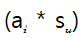

>위의 수식은 다음과 같다.
* i : 평점을 받은 영화 수
* u : 사용자
* ai : average score를 줄인 것, 영화별 평점
* su : Similarity를 의미하는 것, 사용자와의 유사도

> 내가 만든 수식임^^ 언제든 수정 가능

In [ ]:
# user_similarity 인자 추가
def get_recommand_movies(df_non_movies, df_high_score_movies, user_similarity):
  df_src, df_target = get_min_max(df_non_movies, df_high_score_movies)

  # 점수로 추천을 하기 위해 columns 정보 추가
  df_recommand_movies = pd.DataFrame(columns=['title', 'score'])
  
  # zip 함수를 이용하여 2개의 정보 전달
  for title, score in zip(df_src['title'], df_src['score']):
    # copy 추가
    # df_movie_title = df_target[df_target['title']==title].copy()
    df_movie_title = df_target[df_target['title']==title]
    if not df_movie_title.empty:
      # df_src, df_target 정보에서 df_src가 안본 영화인 경우 0으로 표기될 수 있음
      if score==NON_MOVIE :
        score = df_movie_title['score']
      # 사용자 평점과 유사도를 곱하여 평점 가중치 추가
      df_movie_title['score'] = score*user_similarity
      df_recommand_movies = df_recommand_movies.append(df_movie_title)

  return df_recommand_movies

USER1 = 1
USER2 = 266

df_non_movies = get_score_movie(df_ratings_movies_pivot, USER1, NON_MOVIE)
df_high_score_movies = get_score_movie(df_ratings_movies_pivot, USER2, HIGH_SCORE)

user_similarity.values[0]
get_recommand_movies(df_non_movies, df_high_score_movies, user_similarity.values[0])
# print(get_recommand_movies(df_non_movies, df_high_score_movies, user_similarity.values[0]))

> 기존 함수에서 가중치를 위해 user_similarity를 인자로 추가했다. 가중치를 이용하여 별도의 평점을 계산할 것이므로 columns 정보를 2가지로 추가했다.

>반복문에서 title로 안 본 영화를 찾고 score로 가중치 평점을 계산해야 함으로 2가지 정보를 전달하기 위해 zip함수를 이용했다.

>df_src는 입력된 정보 중 적은 값으로 처리하여 반복문의 처리 속도를 높였다. 이러다 보니 전달된 정보가 안 본 영화일 경우 score가 0으로 처리되기 때문에 이를 해결하기 위해 조건문으로 추천 영화의 평점을 적용할 수 있도록 수정했다.

> 다음과 같은 경고가 나타나는데 위의 반복문 아래 있는 파일이 저장되면서 이전 코드에 영향을 미칠 수 있어 경고를 발생하게 된다. 
* /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

> 따라서 다음과 같이 코드를 수정해야 한다.
* df_movie_title = df_target[df_target['title']==title].copy()


In [ ]:
NO_RECOMMAND_MOVIE = 10
TARGET_USER = 1
NON_MOVIE = 0
HIGH_SCORE = 4

user_similarity = get_user_similarity(df_ratings_movies_pivot, TARGET_USER)
df_non_movies = get_score_movie(df_ratings_movies_pivot, TARGET_USER, NON_MOVIE)

df_recommand_movies = pd.DataFrame()
# 유사도로 연산을 해야 함으로 zip 함수 활용
for userId, user_sim in zip(user_similarity.index, user_similarity.values):
  df_high_score_movies = get_score_movie(df_ratings_movies_pivot, userId, HIGH_SCORE)
  # 유사도를 입력하여 가중치 추가
  df_recommand_movie = get_recommand_movies(df_non_movies, df_high_score_movies, user_sim)
  df_recommand_movies = df_recommand_movies.append(df_recommand_movie)
  
df_class_movies = df_recommand_movies.groupby('title')
print(df_class_movies['score'].count().sort_values(ascending=False)[:NO_RECOMMAND_MOVIE])
print(df_class_movies['score'].sum().sort_values(ascending=False)[:NO_RECOMMAND_MOVIE])
print(df_class_movies['score'].mean().sort_values(ascending=False)[:NO_RECOMMAND_MOVIE])

title
Terminator 2: Judgment Day (1991)            9
Aliens (1986)                                8
Godfather, The (1972)                        8
Godfather: Part II, The (1974)               8
Sixth Sense, The (1999)                      8
Die Hard (1988)                              8
Blade Runner (1982)                          7
Gattaca (1997)                               7
Hunt for Red October, The (1990)             7
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    7
Name: score, dtype: int64
title
Terminator 2: Judgment Day (1991)            13.146918
Godfather, The (1972)                        13.134550
Aliens (1986)                                12.936063
Sixth Sense, The (1999)                      12.432916
Godfather: Part II, The (1974)               12.104995
Blade Runner (1982)                          11.556014
Die Hard (1988)                              10.889409
Gattaca (1997)                               10.561737
Hunt for Red October, The (1990)             10.3420

> 전체 카운터로 값을 확인했을 경우 터미네이터(Terminator 2: Judgment Day (1991)) -> 에일리언(Aliens (1986) ) -> 대부(Godfather, The (1972) ) 순이었다. 하지만 가중치를 부여하니 터미네이터(Terminator 2: Judgment Day (1991)) -> 대부(Godfather, The (1972) ) -> 에일리언(Aliens (1986) ) 순으로 변경된 것을 볼 수 있다. 

##3.4 아이템 기반 추천
> 아이템 기반 추천을 위해 전치함수를 이용하자

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

df_ratings_movies_pivot_T = df_ratings_movies_pivot.transpose()

average_grade_movies_similarity = cosine_similarity(df_ratings_movies_pivot_T, df_ratings_movies_pivot_T)
average_grade_movies_similarity

>각 영화별 평점 유사도를 구한 결과이다. 

In [ ]:
df_average_grade_movies_similarity = pd.DataFrame(data=average_grade_movies_similarity, index=df_ratings_movies_pivot.columns, columns=df_ratings_movies_pivot.columns)
df_average_grade_movies_similarity.head()

>각 영화별 평점에 따른 유사도를 dataframe으로 표현해 봤다.

In [ ]:
df_average_grade_movies_similarity["'Hellboy': The Seeds of Creation (2004)"].sort_values(ascending=False)[:10]

> 헬보이('Hellboy': The Seeds of Creation (2004))로 검색해 보니 비슷한 평점을 받은 영화들이 몬스터와 우주전함 야마토로 나타난 것을 볼 수 있다.

> 이렇듯 아이템 기반의 추천 알고리즘을 이용해 영화 추천 시스템을 구축할 수 있다.

##3.5 개인별 영화 추천
> 기존의 추천 시스템에서는 모든 사용자에게 평점을 기준으로하는 추천 시스템을 만들어 봤다. 하지만 개인 취향에 맞는 영화를 추천하지는 못했다. 이번에는 개인 취향에 따른 추천 시스템을 구축해 보도록 하자.

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

TOP_N = 10
def get_mse(pred, actual):
  pred = pred[actual.nonzero()]
  actual = actual[actual.nonzero()]

  return mean_squared_error(pred, actual)

def predict_rating_topsim(ratings_arr, item_sim_arr, n=20):
  pred=np.zeros(ratings_arr.shape)
  
  for col in range(ratings_arr.shape[1]):
    top_n_items = np.argsort(item_sim_arr[:,col])[:-n-1:-1]

    for row in range(ratings_arr.shape[0]):
      pred[row, col] = item_sim_arr[col, :][top_n_items].dot(ratings_arr[row, :][top_n_items])
      pred[row, col] /= np.sum(np.abs(item_sim_arr[col, :][top_n_items]))

  return pred

ratings_pred = predict_rating_topsim(df_ratings_movies_pivot.values, average_grade_movies_similarity, n=TOP_N)
print(get_mse(ratings_pred,df_ratings_movies_pivot.values ))
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index = df_ratings_movies_pivot.index, columns=df_ratings_movies_pivot.columns)
ratings_pred_matrix

>위에서 상위 10개의 영화에 대해서만 예측 평점을 산정함으로 조금 더 정확한 추천을 할 수 있게 된다.

In [ ]:
USERID = 1

def get_unseen_movies(ratings_matrix, userId):
  # userid로 입력받은 사용자의 모든 영화 정보 추출
  user_rating = ratings_matrix.loc[userId, :]
  # 평가한 영화만 추출
  already_seen = user_rating[user_rating>0].index
  # 영화 제목 추출
  movies_list = ratings_matrix.columns
  # 안본 영화 제목 추출
  unseen_list = movies_list[~movies_list.isin(already_seen)]

  return unseen_list.tolist()

def recomm_by_userid(pred_df, userId, unseen_list, top_n=10):
  # 사용자의 예측점수가 포함된 영화
  movies = pred_df.loc[userId]
  # 안본 영화
  unseen_movies = movies[unseen_list]
  # 안본 영화 중 top N 영화
  recomm_movies = unseen_movies.sort_values(ascending=False)[:top_n]
  return recomm_movies

# 안본 영화 목록 획득
unseen_list = get_unseen_movies(df_ratings_movies_pivot, USERID)
# top 10 영화
recomm_movies = recomm_by_userid(ratings_pred_matrix, USERID, unseen_list, TOP_N)
df_recomm_movies = pd.DataFrame(data=recomm_movies.values, index=recomm_movies.index, columns=['pred_score'])
df_recomm_movies

In [ ]:
user_list = ratings_pred_matrix.loc[1]
# user_list
user_list[unseen_list].sort_values(ascending=False)[:10]

In [6]:
for i in range(1, 100, 10):
  print(i)

1
11
21
31
41
51
61
71
81
91
